<a href="https://colab.research.google.com/github/MAbhutto/DSProjects/blob/main/Basic%20Analysis%20and%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#Empty purpose can mean a lot of things so need to fill them
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [ ]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


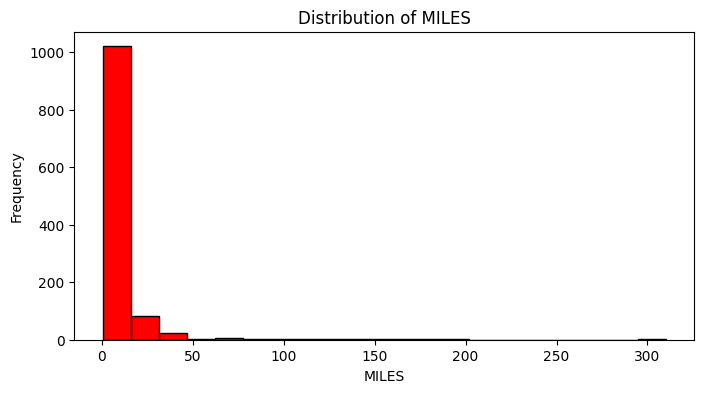

In [ ]:
# Histogram of 'MILES'
plt.figure(figsize=(8, 4))
plt.hist(df['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()



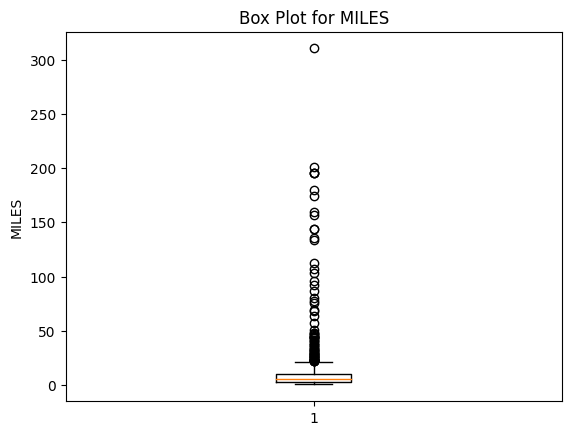

In [ ]:
# Outlier Detection
# Box plot for 'MILES' to visualize outliers
plt.boxplot(df['MILES'], vert=True)
plt.ylabel('MILES')
plt.title('Box Plot for MILES')
plt.show()



In [ ]:
#Removing Outliers
df2 = df[df['MILES']<=50]

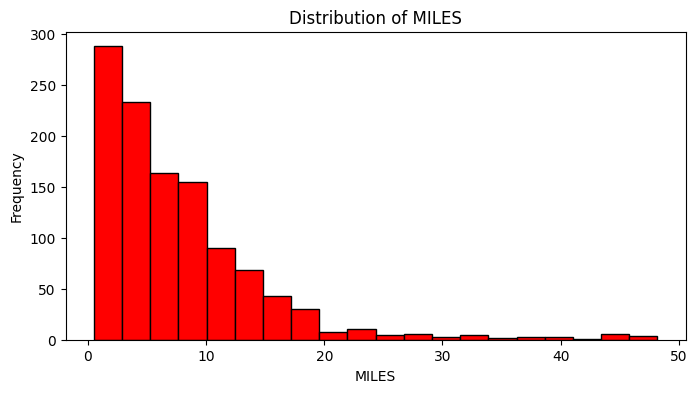

In [ ]:
# Histogram of 'MILES' without outliers
plt.figure(figsize=(8, 4))
plt.hist(df2['MILES'], bins=20, color='red', edgecolor='black')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

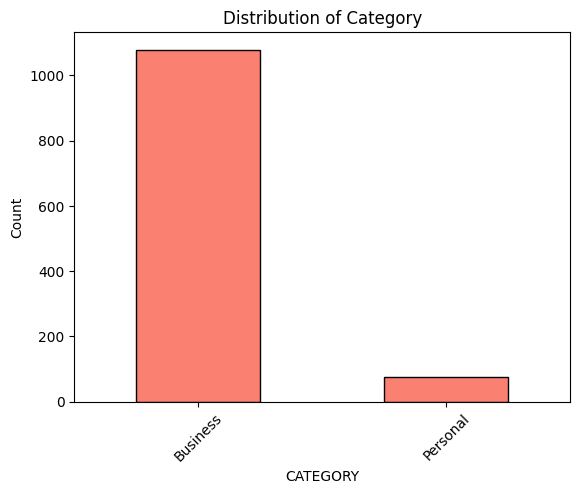

In [ ]:
# Bar plot for 'CATEGORY'
df['CATEGORY'] = df['CATEGORY'].astype('category')
category_counts = df['CATEGORY'].value_counts()
category_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('CATEGORY')
plt.ylabel('Count')
plt.title('Distribution of Category')
plt.xticks(rotation=45)
plt.show()



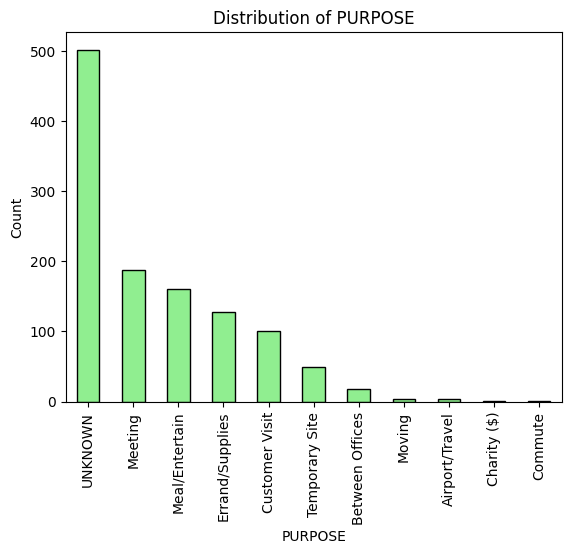

In [ ]:
# Bar plot for 'PURPOSE'
purpose_counts = df['PURPOSE'].value_counts()
purpose_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('PURPOSE')
plt.ylabel('Count')
plt.title('Distribution of PURPOSE')
plt.show()



In [ ]:
# Display unique values and frequency counts for 'CATEGORY' and 'PURPOSE'
print("Unique Categories:")
print(df['CATEGORY'].unique())
print("\nFrequency Counts for PURPOSE:")
print(purpose_counts)



Unique Categories:
['Business' 'Personal']

Frequency Counts for PURPOSE:
UNKNOWN            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


In [ ]:
# converting START_DATE and END_DATE into datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

#Create new feature representing shift of the ride - morning, afternoon, evening, night
df['HOUR'] = df['START_DATE'].apply(lambda i : i.hour)
df['SHIFT'] = df['START_DATE'].apply(lambda i : i.hour)
df['SHIFT'] = pd.cut(x = df['SHIFT'], bins = [0, 6, 11, 17, 20, 24],
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [ ]:
#Create new feature representing month of the ride
df['RIDE_MONTH'] = df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['RIDE_MONTH'] = df['RIDE_MONTH'].map(month_label)
#create new feature representing weekday of the ride
df['WEEKDAY'] = df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['WEEKDAY'] = df['WEEKDAY'].map(day_label)

# duration of the ride
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')


In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Night,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


In [ ]:
df.describe()

,MILES,HOUR,DURATION
count,1155.000000,1155.000000,1155.000000
mean,10.566840,14.696104,23.243290
std,21.579106,4.575226,27.318277
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.500000
max,310.300000,23.000000,336.000000


In [ ]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2016-12-31 22:08:00


In [ ]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


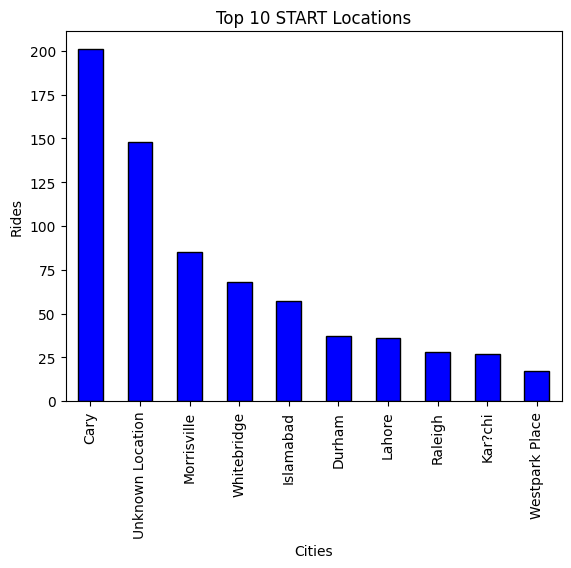

In [ ]:
# Top 10 locations for START
start = df['START'].value_counts().nlargest(10)
start.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('Rides')
plt.title('Top 10 START Locations')

plt.show()

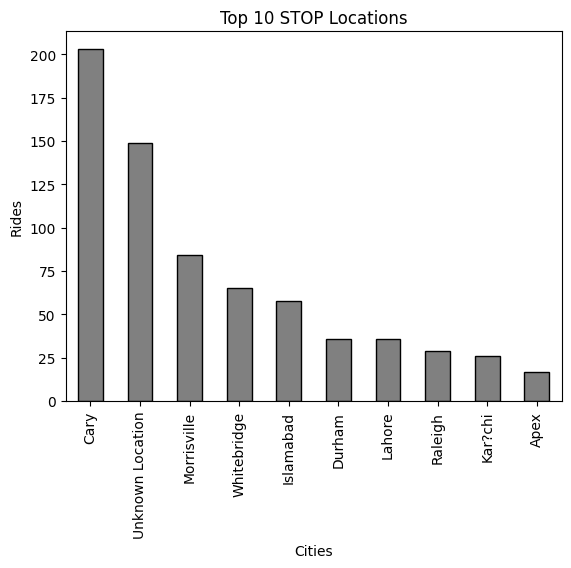

In [ ]:
stop = df['STOP'].value_counts().nlargest(10)
stop.plot(kind='bar', color='grey', edgecolor='black')
plt.xlabel('Cities')
plt.ylabel('Rides')
plt.title('Top 10 STOP Locations')

plt.show()

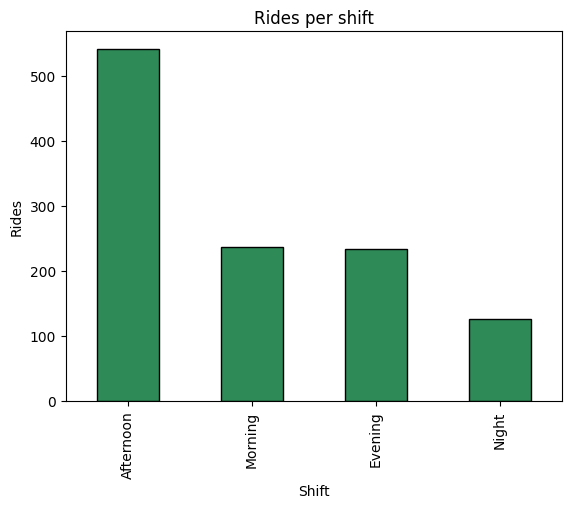

In [ ]:
df['SHIFT'] = df['SHIFT'].astype('category')
shift = df['SHIFT'].value_counts()
shift.plot(kind='bar', color='seagreen', edgecolor = 'black')
plt.xlabel('Shift')
plt.ylabel('Rides')
plt.title('Rides per shift')

plt.show()


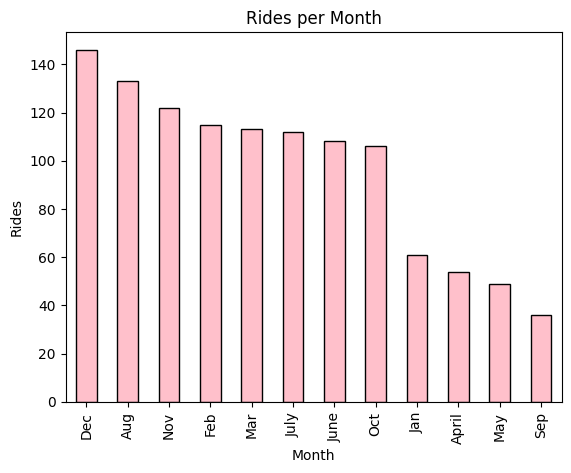

In [ ]:
df['RIDE_MONTH'] = df['RIDE_MONTH'].astype('category')
shift = df['RIDE_MONTH'].value_counts()
shift.plot(kind='bar', color='pink', edgecolor = 'black')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.title('Rides per Month')

plt.show()

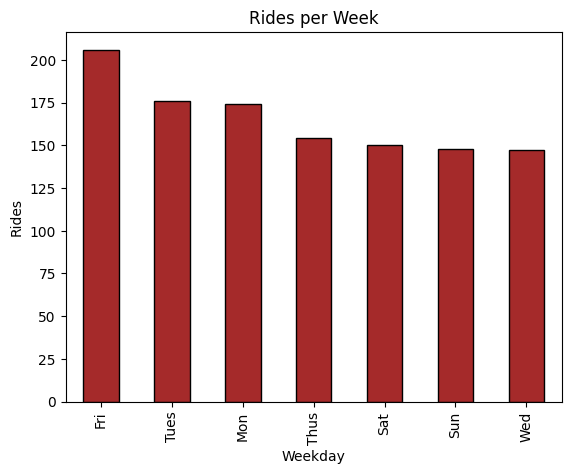

In [ ]:
df['WEEKDAY'] = df['WEEKDAY'].astype('category')
shift = df['WEEKDAY'].value_counts()
shift.plot(kind='bar', color='brown', edgecolor = 'black')
plt.xlabel('Weekday')
plt.ylabel('Rides')
plt.title('Rides per Week')

plt.show()

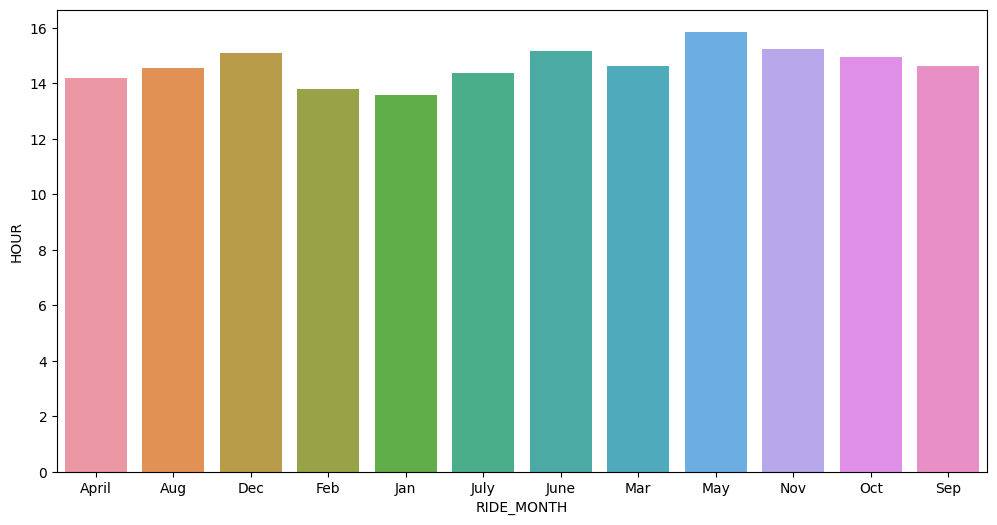

In [ ]:
plt.figure(figsize=(12, 6))
temp = df.groupby('RIDE_MONTH')['HOUR'].mean().reset_index()
sns.barplot(x='RIDE_MONTH', y='HOUR', data=temp)
plt.show()

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
print("Duplicate Rows:")
duplicate_rows


Duplicate Rows:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,SHIFT,RIDE_MONTH,WEEKDAY,DURATION
491,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,23,Night,June,Tues,25.0
492,2016-06-28 23:34:00,2016-06-28 23:59:00,Business,Durham,Cary,9.9,Meeting,23,Night,June,Tues,25.0


In [ ]:
pd.crosstab(df['RIDE_MONTH'], [df['SHIFT'], df['CATEGORY']], rownames=['MONTH'], colnames=['SHIFT', 'CATEGORY'])

SHIFT    Afternoon           Evening           Morning             Night  \
CATEGORY  Business Personal Business Personal Business Personal Business   
MONTH                                                                      
April           26        1        9        0        8        2        7   
Aug             76        0       23        0       27        0        7   
Dec             65        0       36        0       27        0       16   
Feb             54        6       16        2       22        9        4   
Jan             37        0        5        0       14        0        4   
July            30       15       18        3       19        6       12   
June            39        1       20        0       22        0       24   
Mar             36       11       18        9       21        2        9   
May             24        0        7        0        4        0       13   
Nov             64        0       26        0       22        0       10   
Oct             43        0       32        0       20        0        9   
Sep             13        0        9        0       11        0        3   

SHIFT              
CATEGORY Personal  
MONTH              
April           0  
Aug             0  
Dec             0  
Feb             1  
Jan             0  
July            2  
June            0  
Mar             5  
May             0  
Nov             0  
Oct             0  
Sep             0